### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.0.0'

### Set Random Seed

In [3]:
tf.random.set_seed(42)

### Collect Data

In [4]:
(trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [5]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [7]:
trainX.shape, trainY.shape, testX.shape, testY.shape

((60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10))

### Visualize the data

Plot first 10 images in the triaining set and their labels.

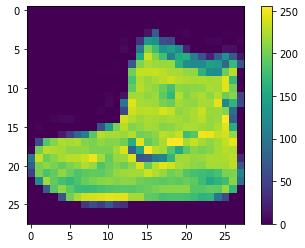

In [8]:
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

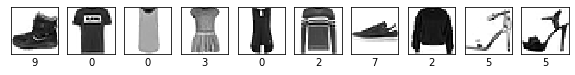

In [9]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(trainY[i]))
    #plt.xlabel(trainY[i])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((784,),input_shape=(28,28,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [12]:
model.fit(trainX, trainY, epochs=10, batch_size = trainX.shape[0])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 233.7262 - accuracy: 0.1228
Epoch 2/10
60000/60000 [==============================] - 0s 5us/sample - loss: 7577.1499 - accuracy: 0.2860
Epoch 3/10
60000/60000 [==============================] - 0s 4us/sample - loss: 13565.4023 - accuracy: 0.3320
Epoch 4/10
60000/60000 [==============================] - 0s 4us/sample - loss: 13559.5684 - accuracy: 0.2504
Epoch 5/10
60000/60000 [==============================] - 0s 4us/sample - loss: 13477.7344 - accuracy: 0.2549
Epoch 6/10
60000/60000 [==============================] - 0s 5us/sample - loss: 12577.6025 - accuracy: 0.3085
Epoch 7/10
60000/60000 [==============================] - 0s 5us/sample - loss: 8405.8408 - accuracy: 0.2187
Epoch 8/10
60000/60000 [==============================] - 0s 4us/sample - loss: 9382.3379 - accuracy: 0.3432
Epoch 9/10
60000/60000 [==============================] - 0s 4us/sample - loss: 11184.5010 - accuracy

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((784,),input_shape=(28,28,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [15]:
model.fit(trainX, trainY, epochs=10, batch_size = trainX.shape[0])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 3.2483 - accuracy: 0.0811
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.9163 - accuracy: 0.1081
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 2.6447 - accuracy: 0.1383
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 2.4196 - accuracy: 0.1724
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.2317 - accuracy: 0.2101
Epoch 6/10
60000/60000 [==============================] - 3s 51us/sample - loss: 2.0744 - accuracy: 0.2491
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 1.9424 - accuracy: 0.2898
Epoch 8/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.8315 - accuracy: 0.3306
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 1.7378 - accuracy: 0.3686
Epoch 10/10
60

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [16]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)

In [17]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(trainX, trainY, epochs=10, batch_size = trainX.shape[0])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 82us/sample - loss: 1.5901 - accuracy: 0.4306
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1.5840 - accuracy: 0.4333
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 1.5780 - accuracy: 0.4362
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 1.5721 - accuracy: 0.4383
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 1.5663 - accuracy: 0.4407
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 1.5605 - accuracy: 0.4429
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 1.5549 - accuracy: 0.4450
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1.5493 - accuracy: 0.4473
Epoch 9/10
60000/60000 [==============================] - 3s 46us/sample - loss: 1.5437 - accuracy: 0.4495
Epoch 10/10
60

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((784,),input_shape=(28,28,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.03)

## Review model

In [21]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

### Run the model

In [22]:
model.fit(trainX, trainY, epochs=10, batch_size = trainX.shape[0])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 94us/sample - loss: 2.4893 - accuracy: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 2.4377 - accuracy: 0.1000
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.4006 - accuracy: 0.1000
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.3727 - accuracy: 0.1003
Epoch 5/10
60000/60000 [==============================] - 4s 58us/sample - loss: 2.3510 - accuracy: 0.1019
Epoch 6/10
60000/60000 [==============================] - 4s 66us/sample - loss: 2.3337 - accuracy: 0.1067
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 2.3196 - accuracy: 0.1176
Epoch 8/10
60000/60000 [==============================] - 3s 54us/sample - loss: 2.3078 - accuracy: 0.1324
Epoch 9/10
60000/60000 [==============================] - 3s 55us/sample - loss: 2.2979 - accuracy: 0.1483
Epoch 10/10
60

### Summary:
- After adding BatchNormalization(), the accuracy increased from 0.3477 to 0.4017
- After setting learning rate of 0.001, the accuracy increased to 0.4519
- After adding two Dense layers of 100 neurons each and learning rate of 0.03, the accuracy came down to 0.1619
- A systematic model tuning parameter exercise is needed to improve the accuracy of the final model